In [11]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

cs_training = pd.read_csv('GiveMeSomeCredit/cs-training.csv', index_col = 0)
cs_test = pd.read_csv('GiveMeSomeCredit/cs-test.csv', index_col = 0)
cs_test_result = pd.read_csv('GiveMeSomeCredit/sampleEntry.csv', index_col = 0)

In [12]:
cs_training = cs_training.apply(lambda x:winsorize(x.fillna(x.mean()), limits = [0.03, 0.03]), axis = 0)
cs_test = cs_test.apply(lambda x:x.fillna(x.mean()), axis = 0)
# split train and valid set
X_train, X_valid, y_train, y_valid = train_test_split(cs_training.iloc[:, 1:].values, cs_training.iloc[:, 0].values, test_size = 0.3, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(cs_test.iloc[:, 1:].values)
y_test = cs_test_result['Probability'].values

In [3]:
lr_l1 = LogisticRegression(penalty="l1", C = 1.505e-4, solver="liblinear")

# # train model
lr_l1.fit(X_train, y_train)
print(lr_l1.coef_)

[[0.         0.         0.00892098 0.         0.         0.
  0.15561808 0.         0.         0.        ]]


In [4]:
# classifier fitting
classifier=svm.SVC(C=1,kernel='poly',gamma='auto',decision_function_shape='ovr', max_iter = 100)#设置训练器
classifier.fit(X_train[:, lr_l1.coef_[0]!=0],y_train.ravel())#对训练集部分进行训练


C:\Users\gong1078899525\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, gamma='auto', kernel='poly', max_iter=100)

In [6]:
## validation
valid_result = classifier.predict(X_valid[:, lr_l1.coef_[0]!=0])
precision = np.sum(valid_result == y_valid)/y_valid.shape[0]## test集合验证
test_result = classifier.predict(X_test[:, lr_l1.coef_[0]!=0])
precision

0.9217555555555556

<AxesSubplot:>

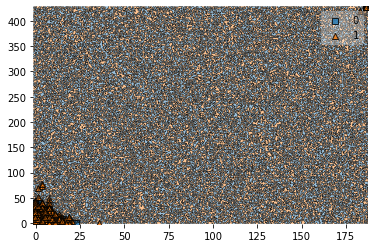

In [18]:
## visualize
plot_decision_regions(X_test[:, lr_l1.coef_[0]!=0], np.around(y_test, 0).astype(int), clf=classifier)